# Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as  plt
import pandas as pd

# Importing the dataset

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
x = dataset.iloc[:, 1:-1 ].values
y = dataset.iloc[:, -1 ].values # -1 index of last column which is the dependent variable `Profit`

In [3]:
print(x)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [4]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [6]:
y = y.reshape(len(y),1)

In [7]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


# Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler() #scaler of X
sc_y = StandardScaler() #scaler of y
# Do not apply feature scaling on dummy variables
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

In [10]:
print(x)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [11]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


# Training the SVR on the whole dataset

In [12]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf') # Builds SVR with Radio-Bases-Function kernel
regressor.fit(x, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

# Predicting a new result

In [13]:
sc_y.inverse_transform(regressor.predict(sc_x.transform( [[6.5]] )).reshape(-1, 1) ) # enter our scaled X vector & reverse the scaling to our output y

array([[170370.0204065]])

# Visualization of the SVR results

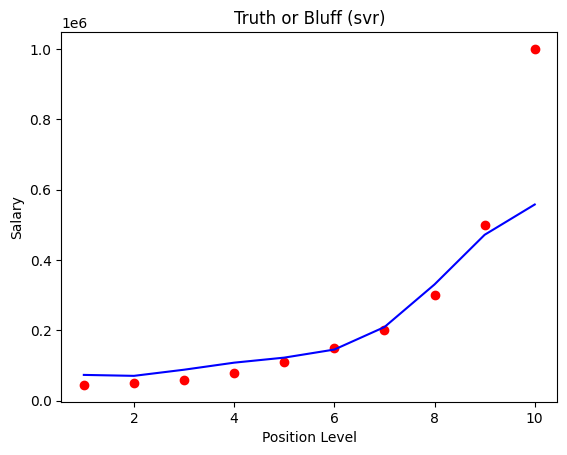

In [14]:
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_x.inverse_transform(x), sc_y.inverse_transform(regressor.predict(x).reshape(-1, 1)), color = 'blue')
plt.title('Truth or Bluff (svr)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

Comments on graph:

# Visualising the SVR results (for higher resolution and smoother curve)

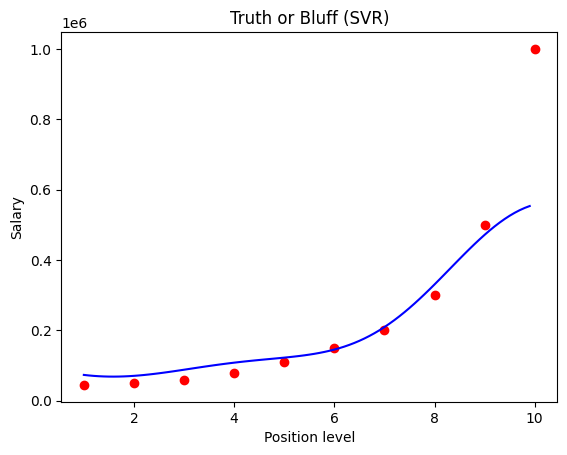

In [15]:
x_grid = np.arange(min(sc_x.inverse_transform(x)), max(sc_x.inverse_transform(x)), 0.1) # We are reversing X to get the original value before scaling
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color = 'red')
plt.plot(x_grid, sc_y.inverse_transform(regressor.predict(sc_x.transform(x_grid)).reshape(-1, 1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()